In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import mnist
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization
from keras.models import Model
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
xtrain1=xtrain.astype('float32')/255.0
xtest1=xtest.astype('float32')/255.0
xtrain1=xtrain1.reshape((len(xtrain1),np.prod(xtrain1.shape[1:])))
xtest1=xtest1.reshape((len(xtest1),np.prod(xtest1.shape[1:])))
print(xtrain1.shape)
print(xtest1.shape)

(60000, 784)
(10000, 784)


In [11]:
encoding_dims=32
input1=Input(shape=(784,))
encod=Dense(encoding_dims,activation='relu')(input1)
decod=Dense(784,activation='sigmoid')(encod)
autoencoder=Model(inputs=input1,outputs=decod)

In [12]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [14]:
encoder=Model(input1,encod)
encoder_input=Input(shape=(encoding_dims,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoder_input,decoder_layer(encoder_input))

In [15]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [17]:
autoencoder.fit(xtrain1,xtrain1,epochs=50,batch_size=256,shuffle=True,validation_data=(xtest1,xtest1))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2766 - val_loss: 0.1891
Epoch 2/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1691 - val_loss: 0.1516
Epoch 3/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.1428 - val_loss: 0.1325
Epoch 4/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1276 - val_loss: 0.1203
Epoch 5/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.1173 - val_loss: 0.1119
Epoch 6/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1102 - val_loss: 0.1061
Epoch 7/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.1053 - val_loss: 0.1019
Epoch 8/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1017 - val_loss: 0.0989
Epoch 9/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.0992 - val_loss: 0.0969
Epoch

In [18]:
encoded_imgs=encoder.predict(xtest1)

In [19]:
decoded_imgs=decoder.predict(encoded_imgs)

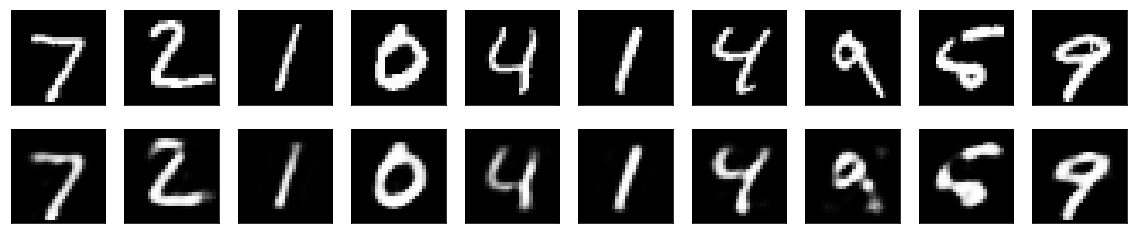

In [20]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(xtest1[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()